In [1]:
from multiprocessing import cpu_count

In [2]:
print(cpu_count())

8


In [3]:
import numpy as np
from view_sampler import *
from algs import *

import loss_funcs
from evaluate import eval_funcs

from evaluate.eval_log import EvalLog
from evaluate.evaluator import Evaluator
from evaluate.dataset import Dataset
from utils.visualize import *

import mealpy

plotter = SearchPlotter(update_freq=100, history=None, alpha=0.5)

# Create a camera configuration
cam_config = CameraConfig(location=(0, 0, 0.3), rotation=(np.pi / 2, 0, 0), fov=60)
world_viewer = ViewSampler("data/hammer/world.xml", cam_config, simulation_time=0)
sim_viewer = ViewSampler("data/hammer/world_sim.xml", cam_config)

loss_func = loss_funcs.IOU()

algorithms = [
    MealAlgorithm(sim_viewer, loss_func, mealpy.swarm_based.PSO.OriginalPSO()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.swarm_based.MSA.OriginalMSA()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.swarm_based.SCSO.OriginalSCSO()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.physics_based.SA.OriginalSA()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.physics_based.EVO.OriginalEVO()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.physics_based.EFO.DevEFO()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.physics_based.EO.ModifiedEO()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.human_based.ICA.OriginalICA(revolution_prob=0.4, empire_count=7)),
    MealAlgorithm(sim_viewer, loss_func, mealpy.human_based.FBIO.DevFBIO()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.human_based.SARO.OriginalSARO()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.evolutionary_based.GA.BaseGA()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.evolutionary_based.CRO.OCRO()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.evolutionary_based.DE.OriginalDE()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.math_based.PSS.OriginalPSS()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.math_based.SCA.DevSCA()),
    MealAlgorithm(sim_viewer, loss_func, mealpy.math_based.HC.OriginalHC()),
]

eval_func = eval_funcs.XorDiff(0.1)
evaluator = Evaluator(world_viewer, sim_viewer, eval_func=eval_func)

dataset = Dataset.create_random(location=(0, 1.3, 0.3), num_samples=100, seed=1)
dataset.visualize(world_viewer)
run_config = MealRunConfig(max_time=15, silent=True)

for alg in algorithms:
    log = EvalLog(alg)
    eval_losses = evaluator.evaluate(alg, run_config, dataset, log=None, plotter=None)
    log.save("logs/")
    print(f"{alg.get_name()} {alg.loss_func.get_name()}: {eval_losses}")

  wl_display@1 still attached


KeyboardInterrupt: 

In [ ]:
world_viewer.close()
sim_viewer.close()
plotter.close()

# ANALYSIS

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [71]:
from evaluate.eval_log import MealLog
from mealpy.utils.history import History
from utils.file import LogFiles
import pandas as pd

path = "grid_search/airplane"

files = LogFiles(path)

In [72]:
data = []
for _ in files:
    try:
        data.append(files.to_dataframe(add_params=True))
    except:
        pass

df = pd.concat(data, axis=0, ignore_index=True)

SystemError: deallocated bytearray object has exported buffers

In [64]:
df.columns

Index(['alg', 'sample', 'eval_loss', 'ref_pos', 'pred_pos', 'epoch',
       'pop_size', 'empire_count', 'assimilation_coeff', 'revolution_prob',
       'revolution_rate', 'revolution_step_size', 'zeta'],
      dtype='object')

In [65]:
df.drop(columns=["alg", "sample", "ref_pos", "pred_pos", "epoch"], inplace=True)

In [66]:
param_cols = ['empire_count', 'assimilation_coeff', 'revolution_prob',
       'revolution_rate', 'revolution_step_size']

In [67]:
import pandas as pd

grouped = df.groupby(param_cols) 

means = grouped[["eval_loss"]].mean()
print(len(df) / len(means))

sorted_means = means.sort_values("eval_loss")
top_indices = sorted_means.index[:20]

display(sorted_means)

top_group_keys = grouped.groups.keys() & top_indices

top = []

for group_key in top_group_keys:
    corresponding_group = grouped.get_group(group_key)
    param_column = pd.Series([str(group_key)] * len(corresponding_group), index=corresponding_group.index)
    corresponding_group["params"] = param_column
    top.append(corresponding_group)

top_df = pd.concat(top, axis=0)

display(top_df)

20.0


eval_loss
empire_count assimilation_coeff revolution_prob revolution_rate revolution_step_size           
10           2.5                0.40            0.400           0.050                  0.023105
                                                0.050           0.050                  0.023105
                                                0.225           0.050                  0.024802
4            1.5                0.21            0.225           0.050                  0.029506
                                                0.400           0.050                  0.029515
...                                                                                         ...
             2.5                0.02            0.050           0.175                  0.066163
                                                0.400           0.175                  0.066250
10           2.5                0.02            0.225           0.300                  0.067440
                                                0.050           0.300                  0.067657
                                                0.225           0.175                  0.072592

[161 rows x 1 columns]

/tmp/ipykernel_307149/1266391158.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corresponding_group["params"] = param_column
/tmp/ipykernel_307149/1266391158.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corresponding_group["params"] = param_column
/tmp/ipykernel_307149/1266391158.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,eval_loss,pop_size,empire_count,assimilation_coeff,revolution_prob,revolution_rate,revolution_step_size,zeta,params
3180,0.048708,100,10,2.5,0.40,0.40,0.175,0.1,"(10, 2.5, 0.4, 0.4, 0.175)"
3181,0.016176,100,10,2.5,0.40,0.40,0.175,0.1,"(10, 2.5, 0.4, 0.4, 0.175)"
3182,0.026700,100,10,2.5,0.40,0.40,0.175,0.1,"(10, 2.5, 0.4, 0.4, 0.175)"
3183,0.025553,100,10,2.5,0.40,0.40,0.175,0.1,"(10, 2.5, 0.4, 0.4, 0.175)"
3184,0.016283,100,10,2.5,0.40,0.40,0.175,0.1,"(10, 2.5, 0.4, 0.4, 0.175)"
...,...,...,...,...,...,...,...,...,...
2355,0.033443,100,10,1.5,0.21,0.05,0.175,0.1,"(10, 1.5, 0.21, 0.05, 0.175)"
2356,0.033408,100,10,1.5,0.21,0.05,0.175,0.1,"(10, 1.5, 0.21, 0.05, 0.175)"
2357,0.082624,100,10,1.5,0.21,0.05,0.175,0.1,"(10, 1.5, 0.21, 0.05, 0.175)"
2358,0.012740,100,10,1.5,0.21,0.05,0.175,0.1,"(10, 1.5, 0.21, 0.05, 0.175)"


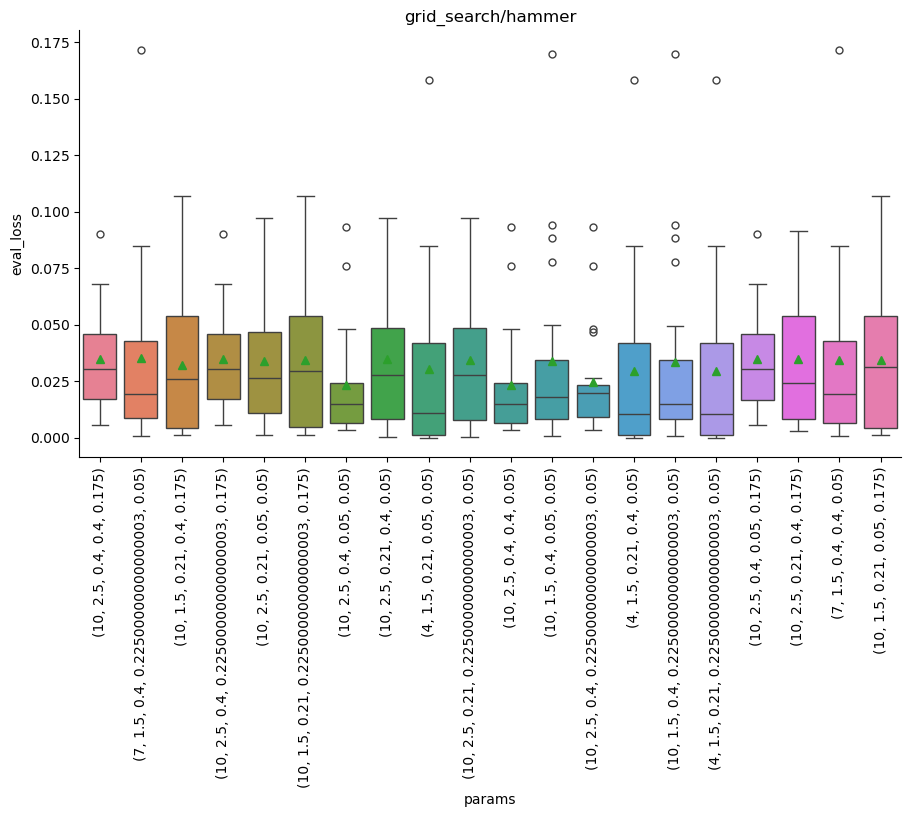

In [68]:
g = sns.catplot(
    data=top_df,
    x="params",
    y="eval_loss",
    kind="box",
    hue="params",
    errorbar="sd",
    showmeans=True,
    aspect=2,
)
g.ax.title.set_text(path)
g.ax.tick_params(axis="x", rotation=90)

In [69]:
algs = pd.unique(df["revolution_rate"])
medians = {"alg": [], "median": []}
for alg in algs:
    mask = df["alg"] == alg
    # print(dataframe[mask][['eval_loss']])
    median = df[mask][["eval_loss"]].median()
    # medians[alg] = median.item()
    medians["alg"].append(alg)
    medians["median"].append(median.item())

KeyError: 'alg'

In [ ]:
display(df)

,eval_loss,pop_size,empire_count,assimilation_coeff,revolution_prob,revolution_rate,revolution_step_size,zeta
0,0.023219,100,4,1.5,0.02,0.05,0.05,0.1
1,0.017244,100,4,1.5,0.02,0.05,0.05,0.1
2,0.082763,100,4,1.5,0.02,0.05,0.05,0.1
3,0.005450,100,4,1.5,0.02,0.05,0.05,0.1
4,0.069247,100,4,1.5,0.02,0.05,0.05,0.1
...,...,...,...,...,...,...,...,...
3215,0.045740,100,10,2.5,0.40,0.40,0.30,0.1
3216,0.038234,100,10,2.5,0.40,0.40,0.30,0.1
3217,0.147384,100,10,2.5,0.40,0.40,0.30,0.1
3218,0.040300,100,10,2.5,0.40,0.40,0.30,0.1


In [ ]:
medians = pd.DataFrame(medians)
medians.sort_values(by="median", inplace=True)

In [ ]:
# fig, ax = plt.subplots(figsize=(10,40))
g = sns.catplot(
    data=df,
    x="alg",
    y="eval_loss",
    hue="alg",
    kind="box",
    errorbar="sd",
    aspect=8,
    order=medians.alg,
    hue_order=medians.alg,
)
g.ax.tick_params(axis="x", rotation=90)

ValueError: Could not interpret value `alg` for `x`. An entry with this name does not appear in `data`.

In [ ]:
print(medians.alg.to_list())